# 題目 - Find the constructions !
data：2022年PTT美食版共四個月的資料


> 請在資料中找出下列5個two-slot-construction（2個變項)：

1.   X + 的 + Y + 的
2.   不 + X1 + 不 + X2
3.   X + 了 + Y + 了
4.   一 + q1 + 一 + q2
5.   好 + v1 + 好 + v2

需要特別留意的是，我們並非在尋找四字格，X, Y等這些變項都是word (not character)！



---





資料來源參考晴方學姊:
[北大構式語料庫](http://ccl.pku.edu.cn/ccgd/)共收錄了1113個簡體中文構式。
晴方學姊以PTT 2020年整年的15個版去篩選（台灣繁體語用），其中共有25個構式有超過100筆，最後選出12個有多義的構式進行研究。
[Demo App ](https://andreashih.shinyapps.io/cca-python1/?fbclid=IwAR1Ii3jl4rmfd4bEQNE3TqmIUw55ctqiO1mRdYLht-54MKgeVgHdgUvJhzo)









##（1) 前處理（10%)

資料格式為json檔，每一篇PTT貼文會有title跟content，其中content包含po文內容跟留言，都已經用換行符號斷句。

請用上週的方式清理資料，並用ckip進行斷詞。

In [ ]:
data[0]

{'title': '[食記] 台南.柳營-露水雞。鄉野小路間的美食',
 'content': ['餐廳名稱：台南。柳營》露水雞',
  '   消費時間：2022年/01月',
  '   地址：台南市柳營區旭山里山子腳10鄰21之25號(縣道165號23K處)',
  '   電話：(06)623-1799',
  '   營業時間：10:30-14:00/17:00-19:30(週一公休)',
  '   每人平均價位：350元左右',
  '   可否刷卡：否',
  '   有無包廂：無',
  '   推薦菜色：枸杞雞.茄餅',
  '   圖文網誌版：https://bo2popo.com/202201-ta04/',
  '話說這家露水雞可是誤打誤撞發現的在地名店。',
  '讓我老公讚不絕口，直誇有機會下次還要再來。',
  '元旦連假，不想出遠門人擠人，想說帶小孩鄰近的區域走走，',
  '往仙湖農場的途中發現這間很多人排隊的店。',
  '看似簡陋的鐵皮屋，加上偌大的招牌只寫了大大的「露水雞」三字，',
  '讓人燃起無限的好奇心。google了一下才發現還蠻多人推薦的，',
  '就決定回程時再來用餐。後來發現，',
  '輸入地址會找不到地方，直接設「柳營露水雞」就可以了。',
  '店外只有畫幾格停車格，很快就滿格，基本上道路兩旁也都可以停車。',
  '晚餐時間5點開始營業，我們約莫5點半左右到達，竟然已經客滿。',
  '生意真的是出乎意料外的好，',
  '基本上到了就先拿點餐單，劃記完後拿給門口小哥後就等著安排座位入座。',
  '用餐規則不少：',
  '1.假日需現場候位，不接受訂位。',
  '2.現場請等候安排座位，勿直接入內佔位。(人要全到才能入座)',
  '3.店內無販售酒精性飲料。',
  '4.寵物請勿進入餐廳。',
  '5.餐廳內全面禁菸。',
  '基本上這些規定都還算蠻可以，',
  '尤其是第二點，我覺得非常好，反正就是按順序等座位也比較公平。',
  '服務態度算可以，基本上臉酷酷的櫃台小哥已經算是裡面最親切的，',
  '我家以前也開過餐廳，倒是能理解忙起來的時候總是會忘記笑容。',
  '店內用餐空間不算大，約莫8~9張圓桌，',
  '有些桌距很近，相鄰的椅子會撞椅子，坐起來是蠻擁擠的。',


In [ ]:
# 要清理掉的regex
trash_regex = "@\S+|https?:\S+|http?:\S|[^\u4E00-\u9FD5]"

In [ ]:
txt[:10]

['食記台南柳營露水雞鄉野小路間的美食',
 '餐廳名稱台南柳營露水雞',
 '消費時間年月',
 '地址台南市柳營區旭山里山子腳鄰之號縣道號處',
 '電話',
 '營業時間週一公休',
 '每人平均價位元左右',
 '可否刷卡否',
 '有無包廂無',
 '推薦菜色枸杞雞茄餅']

In [12]:
! pip3 install -U ckip-transformers
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger

# tokenize function
## ws: [['A','B'],['a','b','c']]  
## output:['A B', 'a b c']

def tokenize(texts, ws_driver, batch_size=512, max_length=256):
    output=[]
    ws  = ws_driver(texts, use_delim=False, 
                batch_size = batch_size,
                 max_length = max_length
                )
    output = [" ".join(ls) for ls in ws]
    return ws, output

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
'''執行階段記得選GPU 不然會很久很久很久'''
ws_driver = CkipWordSegmenter(device=0)
ws, output = tokenize(txt, ws_driver)
output[:10]

Inference: 100%|██████████| 190/190 [14:57<00:00,  4.72s/it]


['食記 台南 柳營 露水雞 鄉野 小路 間 的 美食',
 '餐廳 名稱 台南 柳營 露水雞',
 '消費 時間 年 月',
 '地址 台南市 柳營區 旭山里 山子腳鄰 之號 縣道號 處',
 '電話',
 '營業 時間 週一 公休',
 '每 人 平均 價位 元 左右',
 '可否 刷卡 否',
 '有無 包廂 無',
 '推薦 菜色 枸杞 雞 茄餅']

# 自己來的部分

In [1]:
#讀取json
import json

with open('ppt_food_2022.json') as f:
    js_data = json.load(f)

In [2]:
js_data[1]

{'title': '[食記] 猿羽川鰻魚專賣',
 'content': ['餐廳名稱：猿羽川 鰻魚專賣',
  '   消費時間：111年/2月',
  '   地址：花蓮縣花蓮市永興路3號',
  '   電話：03-8232988',
  '   營業時間：中午11:30-14:00 晚間17:30-20:30',
  '',
  '網誌圖文版：https://kuokuo.tw/hualie-saruhanekawa/',
  '',
  '記得在2年前的疫情爆發之前，每年都要去日本旅遊一番，才能算是有好好放假的感覺。',
  '對於在當地所享用到鰻魚飯滋味，讓我一直念念不忘啊，也是我在花蓮想要找好吃鰻魚飯',
  '的動力。而今天所要探訪的猿羽川，則是被許多人稱為「花蓮最強鰻魚飯」的稱號，所以',
  '無論如何都要來試試看得啊。',
  '店面就位於花蓮翰品酒店的斜對面，然後鄰近門諾醫院。附近沿著高等法院的外牆邊都很',
  '好停車，所以是個交通位置靠近市區，卻又相當便利的點。',
  '走進店面就能看得出猿羽川在裝潢上的用心，旁邊參雜了點點稻草的石牆，也呈現出日本',
  '城的風味感。來到日式料亭除了享用美食佳餚之外，不可或缺的就是清酒了，店內也有許',
  '多不同的品項能夠任君挑選。',
  '一般我們常聽到的日本三大和牛，分別是神戶牛、松阪牛，以及近江牛。但其實飛驒牛也',
  '是赫赫有名的黑毛和牛品牌之一呢。除了有專屬的認證書之外，猿羽川選用的更是肉質5',
  '的等級，想到就流口水了啊，下次來如果有機會一定要試試看的。',
  '店內用餐空間其實並不算大，以簡潔有力的裝潢感營造出淡淡的日式素雅。而店面後方則',
  '是有間較為寬敞的包廂，今天造訪時就碰上公司行號包場使用。',
  '不管是日式料亭還是鐵板燒等類型的餐廳，我最喜歡吧台前的座位了。除了可以近距離觀',
  '賞師傅的料理手藝之外，視覺上的饗宴也是在用餐時相當重要的一環。',
  '全神貫注的將每一貫海膽刺身鋪上調料，呈現出來的樣貌，我想就是大家所說「一身懸命',
  '的職人精神」吧？突然又讓我很想念去札幌二条市場，以及大阪黑門市場享受現剖現吃海',
  '膽的快感，鮮甜滑順的口感真是讓人回味無窮啊。',
  '桌上提供了罐京都舞技的山椒粉，可以加在鰻魚飯裡食用，藉此

In [3]:
#re清理

import re

# 要清理掉的regex
trash_regex = "@\S+|https?:\S+|http?:\S|[^\u4E00-\u9FD5]"

processed_content = []

for info in js_data:
  for key in info.keys():
    if key == 'title':
        info[key] = re.sub(trash_regex, '', info[key])
    elif key == 'content':
        info[key] = [re.sub(trash_regex, '', content) for content in info[key]]

js_data[1]

{'title': '食記猿羽川鰻魚專賣',
 'content': ['餐廳名稱猿羽川鰻魚專賣',
  '消費時間年月',
  '地址花蓮縣花蓮市永興路號',
  '電話',
  '營業時間中午晚間',
  '',
  '網誌圖文版',
  '',
  '記得在年前的疫情爆發之前每年都要去日本旅遊一番才能算是有好好放假的感覺',
  '對於在當地所享用到鰻魚飯滋味讓我一直念念不忘啊也是我在花蓮想要找好吃鰻魚飯',
  '的動力而今天所要探訪的猿羽川則是被許多人稱為花蓮最強鰻魚飯的稱號所以',
  '無論如何都要來試試看得啊',
  '店面就位於花蓮翰品酒店的斜對面然後鄰近門諾醫院附近沿著高等法院的外牆邊都很',
  '好停車所以是個交通位置靠近市區卻又相當便利的點',
  '走進店面就能看得出猿羽川在裝潢上的用心旁邊參雜了點點稻草的石牆也呈現出日本',
  '城的風味感來到日式料亭除了享用美食佳餚之外不可或缺的就是清酒了店內也有許',
  '多不同的品項能夠任君挑選',
  '一般我們常聽到的日本三大和牛分別是神戶牛松阪牛以及近江牛但其實飛驒牛也',
  '是赫赫有名的黑毛和牛品牌之一呢除了有專屬的認證書之外猿羽川選用的更是肉質',
  '的等級想到就流口水了啊下次來如果有機會一定要試試看的',
  '店內用餐空間其實並不算大以簡潔有力的裝潢感營造出淡淡的日式素雅而店面後方則',
  '是有間較為寬敞的包廂今天造訪時就碰上公司行號包場使用',
  '不管是日式料亭還是鐵板燒等類型的餐廳我最喜歡吧台前的座位了除了可以近距離觀',
  '賞師傅的料理手藝之外視覺上的饗宴也是在用餐時相當重要的一環',
  '全神貫注的將每一貫海膽刺身鋪上調料呈現出來的樣貌我想就是大家所說一身懸命',
  '的職人精神吧突然又讓我很想念去札幌二条市場以及大阪黑門市場享受現剖現吃海',
  '膽的快感鮮甜滑順的口感真是讓人回味無窮啊',
  '桌上提供了罐京都舞技的山椒粉可以加在鰻魚飯裡食用藉此提升整體層次感不過也',
  '建議大家可以先吃吃看原味然後等中後段再加入鰻魚飯裡搭配會吃出不一樣的感覺',
  '餐點除了專賣鰻魚飯之外還有鮭魚卵海鮮丼以及炭火燒牛肉定食能選擇並且在吧檯座',
  '位的上方還有單點品項能參考多半是季節限定的漁獲食材下去入菜',
  '雖然鰻魚飯是日本當地赫赫有名

In [4]:
txt = []
for item in js_data:
    txt.append(item['title'])
    txt.extend(item['content'])
txt[:10]

['食記台南柳營露水雞鄉野小路間的美食',
 '餐廳名稱台南柳營露水雞',
 '消費時間年月',
 '地址台南市柳營區旭山里山子腳鄰之號縣道號處',
 '電話',
 '營業時間週一公休',
 '每人平均價位元左右',
 '可否刷卡否',
 '有無包廂無',
 '推薦菜色枸杞雞茄餅']

In [1]:
! pip3 install -U ckip-transformers
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger

# tokenize function
## ws: [['A','B'],['a','b','c']]  
## output:['A B', 'a b c']

def tokenize(texts, ws_driver, batch_size=512, max_length=256):
    output=[]
    ws  = ws_driver(texts, use_delim=False, 
                batch_size = batch_size,
                 max_length = max_length
                )
    output = [" ".join(ls) for ls in ws]
    return ws, output

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
'''執行階段記得選GPU 不然會很久很久很久'''
ws_driver = CkipWordSegmenter(device=0)
ws, output = tokenize(txt, ws_driver)
output[:10]

Inference: 100%|██████████| 190/190 [13:41<00:00,  4.32s/it]


['食記 台南 柳營 露水雞 鄉野 小路 間 的 美食',
 '餐廳 名稱 台南 柳營 露水雞',
 '消費 時間 年 月',
 '地址 台南市 柳營區 旭山里 山子腳鄰 之號 縣道號 處',
 '電話',
 '營業 時間 週一 公休',
 '每 人 平均 價位 元 左右',
 '可否 刷卡 否',
 '有無 包廂 無',
 '推薦 菜色 枸杞 雞 茄餅']

In [ ]:
import pickle

#存成pickle
with open('cntxt_seg.pickle', 'wb') as f:
    pickle.dump(output, f)

In [2]:
import pickle
#讀取pickle
with open('ppt_seg.pickle', 'rb') as f:
    cntxt_seg = pickle.load(f)

In [3]:
cntxt_seg[:10]

['食記 台南 柳營 露水雞 鄉野 小路 間 的 美食',
 '餐廳 名稱 台南 柳營 露水雞',
 '消費 時間 年 月',
 '地址 台南市 柳營區 旭山里 山子腳鄰 之號 縣道號 處',
 '電話',
 '營業 時間 週一 公休',
 '每 人 平均 價位 元 左右',
 '可否 刷卡 否',
 '有無 包廂 無',
 '推薦 菜色 枸杞 雞 茄餅']

In [4]:
print(len(cntxt_seg))

96928


## (2) 找出構式！(40%)


整理出一個構式DataFrame，包含7個欄位：

*   form: construction pattern
*   cnstr: 資料中match到的構式（10%)
*   cntxt: context，出現構式的那整個句子 (10%)
*   var_1: 第一個變項 (5%)
*   var_2: 第二個變項 (5%)
*   var1_pos: 第一個變項的詞性 (5%)
*   var2_pos: 第二個變項的詞性 (5%)

請注意！
詞性的篩選請至少以「資料中match到的構式」為單位，例如「吃 的 喝 的」要整組進行pos-tagging，再取出變項「吃」跟「喝」的詞性，不可以只有單獨tag「吃」跟「喝」。

> ⚠️⚠️⚠️``print df[300:310]``⚠️⚠️⚠️

In [5]:
cnstrs = [
    ["X", "+", "的", "+", "Y", "+", "的"],
    ["不", "+", "X1", "+", "不", "+", "X2"],
    ["X", "+", "了", "+", "Y", "+", "了"],
    ["好", "+", "v1", "+", "好", "+", "v2"],
    ["一", "+", "q1", "+", "一", "+", "q2"]
]

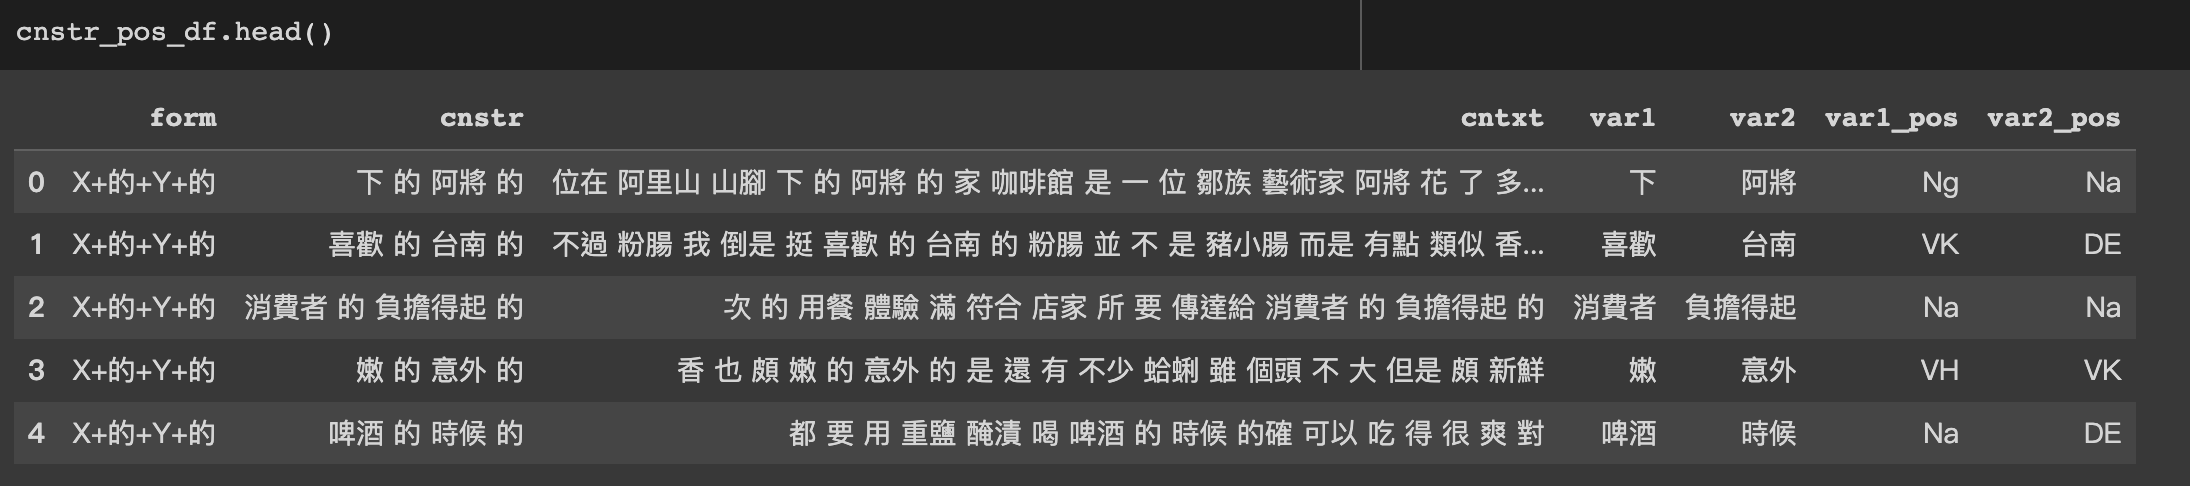

In [6]:
for i in range(0,5):
    print(cnstrs[i])


['X', '+', '的', '+', 'Y', '+', '的']
['不', '+', 'X1', '+', '不', '+', 'X2']
['X', '+', '了', '+', 'Y', '+', '了']
['好', '+', 'v1', '+', '好', '+', 'v2']
['一', '+', 'q1', '+', '一', '+', 'q2']


In [7]:
print(cnstrs[0])
print(cnstrs[2])

patterns = [cnstrs[0],cnstrs[2]]
print(patterns)

['X', '+', '的', '+', 'Y', '+', '的']
['X', '+', '了', '+', 'Y', '+', '了']
[['X', '+', '的', '+', 'Y', '+', '的'], ['X', '+', '了', '+', 'Y', '+', '了']]


In [8]:
import re
import pandas as pd

cntxt_1 = []
cntxt_2 = []
cntxt_3 = []
cntxt_4 = []
cntxt_5 = []

cnstr_1 = []
cnstr_2 = []
cnstr_3 = []
cnstr_4 = []
cnstr_5 = []

form_1 = []
form_2 = []
form_3 = []
form_4 = []
form_5 = []


for sentence in cntxt_seg:
        regex_5_sep = ''.join(cnstrs[4]).replace("+", "\s").replace('q1','\w+').replace('q2','\w+')

        regex_4_sep = ''.join(cnstrs[3]).replace("+", "\s").replace('v1','\w+').replace('v2','\w+')

        regex_3_sep = ''.join(cnstrs[2]).replace("+", "\s").replace('X','\w+').replace('Y','\w+')

        regex_1_sep = ''.join(cnstrs[0]).replace("+", "\s").replace('X','\w+').replace('Y','\w+')

        regex_2_sep = ''.join(cnstrs[1]).replace("+", "\s").replace('X1','\w+').replace('X2','\w+')

        if re.search(regex_1_sep, sentence):
            cntxt_1.append(sentence)  
            cnstr_1.append(re.search(regex_1_sep, sentence).group(0))
            form_1.append("X+的+Y+的")

        elif re.search(regex_2_sep, sentence):
            cntxt_2.append(sentence)                        
            cnstr_2.append(re.search(regex_2_sep, sentence).group(0))
            form_2.append("不+X1+不+X2")

        elif re.search(regex_3_sep, sentence):
            cntxt_3.append(sentence)  
            cnstr_3.append(re.search(regex_3_sep, sentence).group(0))
            form_3.append("X+了+Y+了")

        elif re.search(regex_4_sep, sentence):
            cntxt_4.append(sentence)
            cnstr_4.append(re.search(regex_4_sep, sentence).group(0))
            form_4.append("好+v1+好+v2")

        elif re.search(regex_5_sep, sentence):
            cntxt_5.append(sentence)
            cnstr_5.append(re.search(regex_5_sep, sentence).group(0))
            form_5.append("一+q1+一+q2")



print(len(cntxt_5))
print(len(cntxt_4))
print(len(cntxt_3))
print(len(cntxt_2))
print(len(cntxt_1))

print(cntxt_1)
print(cntxt_2)
print(cntxt_3)
print(cntxt_4)
print(cntxt_5)


183
37
20
62
323
['位在 阿里山 山腳 下 的 阿將 的 家 咖啡館 是 一 位 鄒族 藝術家 阿將 花 了 多 年 的 時間 打造出', '不過 粉腸 我 倒是 挺 喜歡 的 台南 的 粉腸 並 不 是 豬小腸 而是 有點 類似 香腸 在 腸衣 裡 包裹', '次 的 用餐 體驗 滿 符合 店家 所 要 傳達給 消費者 的 負擔得起 的', '香 也 頗 嫩 的 意外 的 是 還 有 不少 蛤蜊 雖 個頭 不 大 但是 頗 新鮮', '都 要 用 重鹽 醃漬 喝 啤酒 的 時候 的確 可以 吃 得 很 爽 對', '都 要 用 重鹽 醃漬 喝 啤酒 的 時候 的確 可以 吃 得 很 爽 對', '非常 的 沉甸甸 的', '蝦醬 空心菜 也 是 相當 經典 的 泰國 菜 份量 滿 大 的 蝦醬 的 味道 很 不錯 當然 同樣 是 相當', '中間 夾有 冰 奶油 的 熱熱 的 菠蘿油 可以 的話 真的 是 要 熱騰騰 的 吃 才 是 最 好吃 的 時候', '這麼 經典 的 港式 點心 真的 是 不管 到 哪 個 港式 茶餐廳 港點 餐館 必 點 的 金黃 的 外表 酥酥 脆脆 的 菠蘿皮 夾上 奶油 甜鹹 的 口味 熱熱 的 咬 一 口 吃 得 到 菠蘿 的 酥香 奶油 的 冰涼 這 就 是 冰火 波羅 的 最 大 精髓 覺得 好吃', '像 我們 在 喝 奶蓋茶 一樣 如果 小 旅伴 們 很 喜歡 飲料店 的 奶蓋 的話 這 個 絕對 要點 照 這 種', '費工 的 製作 方式 和 不錯 的 食材 的 價格 算是 值得 的', '豚骨 拉麵 的 部分 的 基本 設定 是 有 加 辣', '饗入 菲菲 的 位置 就 在 內壢 長春路 上 開幕 約 二 個 多 月 而已 門口 還 滿 好看 的 可惜 的 是 沒有 招牌 相當 低調', '生 巧克力塔 用 的 是 的 比利時 苦甜 可可 還 放 了 玫瑰花 碎 點綴', '切開來 看 斷面 這 是 我 今年 切到 最 完整 的 草莓 大福 對比 口感 相似 外觀 也 差不多 的 法朋 的 草莓 大福 陳耀訓 的 版本 美 太多', '像是 台北 的 高雄 的 炭火 料理 工坊', '那 一 大 顆 煎 干貝 也 大大 撫慰 了 因為 不 想 吃 杏鮑菇 而 沙拉 沒 點到 干貝 的 我 的 心靈

In [9]:
#合併每一種構式的欄位
def df_num(form, cnstr, cntxt):
    lst = [form, cnstr, cntxt]
    df_num = pd.DataFrame(lst).T
    df_num.columns = ['form','cnstr','cntxt']
    return df_num

In [10]:
df_1 = df_num(form_1, cnstr_1, cntxt_1)
df_2 = df_num(form_2, cnstr_2, cntxt_2)
df_3 = df_num(form_3, cnstr_3, cntxt_3)
df_4 = df_num(form_4, cnstr_4, cntxt_4)
df_5 = df_num(form_5, cnstr_5, cntxt_5)

result = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0)
result


,form,cnstr,cntxt
0,X+的+Y+的,下 的 阿將 的,位在 阿里山 山腳 下 的 阿將 的 家 咖啡館 是 一 位 鄒族 藝術家 阿將 花 了 多...
1,X+的+Y+的,喜歡 的 台南 的,不過 粉腸 我 倒是 挺 喜歡 的 台南 的 粉腸 並 不 是 豬小腸 而是 有點 類似 香...
2,X+的+Y+的,消費者 的 負擔得起 的,次 的 用餐 體驗 滿 符合 店家 所 要 傳達給 消費者 的 負擔得起 的
3,X+的+Y+的,嫩 的 意外 的,香 也 頗 嫩 的 意外 的 是 還 有 不少 蛤蜊 雖 個頭 不 大 但是 頗 新鮮
4,X+的+Y+的,啤酒 的 時候 的,都 要 用 重鹽 醃漬 喝 啤酒 的 時候 的確 可以 吃 得 很 爽 對
...,...,...,...
178,一+q1+一+q2,一 絲 一 絲,搭配 飯 而是 吐司 還是 可以 給予 滿滿 飽足感 漢堡排 富有 嚼勁 一 絲 一 絲 的...
179,一+q1+一+q2,一 次 一 人,這 間 是 黛西 朋友 熱愛 的 彰化 鹿港 伴手禮 明豐珍 兔仔寮 牛舌餅 他 說 他 每...
180,一+q1+一+q2,一 人 一 張,兔仔寮 牛舌餅 從 早上 點 開始 發 號碼牌 一 人 一 張 一 張 限 買 包包 的 價...
181,一+q1+一+q2,一 層 一 層,一 層 一 層 單 吃 或是 三 層 搭配 一起 吃 都 美味


In [13]:
pos_driver = CkipPosTagger(model="bert-base")

In [14]:
df_1['pos_tags'] = df_1['cnstr'].apply(lambda x: pos_driver(x))
df_2['pos_tags'] = df_2['cnstr'].apply(lambda x: pos_driver(x))
df_3['pos_tags'] = df_3['cnstr'].apply(lambda x: pos_driver(x))
df_4['pos_tags'] = df_4['cnstr'].apply(lambda x: pos_driver(x))
df_5['pos_tags'] = df_5['cnstr'].apply(lambda x: pos_driver(x))

df_1
#result_2 = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0)
#result_2

Inference: 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]


,form,cnstr,cntxt,pos_tags
0,X+的+Y+的,下 的 阿將 的,位在 阿里山 山腳 下 的 阿將 的 家 咖啡館 是 一 位 鄒族 藝術家 阿將 花 了 多...,"[[Nes], [WHITESPACE], [DE], [WHITESPACE], [Nb]..."
1,X+的+Y+的,喜歡 的 台南 的,不過 粉腸 我 倒是 挺 喜歡 的 台南 的 粉腸 並 不 是 豬小腸 而是 有點 類似 香...,"[[VK], [VH], [WHITESPACE], [DE], [WHITESPACE],..."
2,X+的+Y+的,消費者 的 負擔得起 的,次 的 用餐 體驗 滿 符合 店家 所 要 傳達給 消費者 的 負擔得起 的,"[[VH], [VJ], [Na], [WHITESPACE], [DE], [WHITES..."
3,X+的+Y+的,嫩 的 意外 的,香 也 頗 嫩 的 意外 的 是 還 有 不少 蛤蜊 雖 個頭 不 大 但是 頗 新鮮,"[[VH], [WHITESPACE], [DE], [WHITESPACE], [Na],..."
4,X+的+Y+的,啤酒 的 時候 的,都 要 用 重鹽 醃漬 喝 啤酒 的 時候 的確 可以 吃 得 很 爽 對,"[[Na], [Na], [WHITESPACE], [DE], [WHITESPACE],..."
...,...,...,...,...
318,X+的+Y+的,紅通通 的 蝦子 的,若 她 經過 這 個 街角 該 是 看到 什麼 顏色 是 紅通通 的 蝦子 的 顏色 嗎,"[[VH], [D], [D], [WHITESPACE], [DE], [WHITESPA..."
319,X+的+Y+的,煎 的 恰恰 的,煎餃 煎 的 恰恰 的 沒有 連 在一起 那 種 蜂巢 是 蠻 好吃 的,"[[VC], [WHITESPACE], [DE], [WHITESPACE], [D], ..."
320,X+的+Y+的,明顯 的 京 的,搭配 米釀味 明顯 的 京 的 梅酒 油膩感 一 上來 就 被 口 中 酒液 給 沖散,"[[VH], [VK], [WHITESPACE], [DE], [WHITESPACE],..."
321,X+的+Y+的,飼料 的 酒粕 的,問 了 老闆 卻 沒有 事先 用 酒 醃 過 老闆 說 可能 是 作為 桂丁雞 飼料 的 酒...,"[[VC], [VE], [WHITESPACE], [DE], [WHITESPACE],..."


In [15]:
#X的Y的
df1_var1 = []
df1_var2 = []

df1_var1_pos = []
df1_var2_pos = []

for word in df_1['cnstr']:
    df1_var1.append(word[0])
    df1_var2.append(word[4])

for pos in df_1['pos_tags']:
    df1_var1_pos.append(pos[0])
    df1_var2_pos.append(pos[4])

#不+X1+不+X2
df2_var1 = []
df2_var2 = []

df2_var1_pos = []
df2_var2_pos = []

for word in df_2['cnstr']:
    df2_var1.append(word[2])
    df2_var2.append(word[6])

for pos in df_2['pos_tags']:
    df2_var1_pos.append(pos[2])
    df2_var2_pos.append(pos[6])

#X+了+Y+了
df3_var1 = []
df3_var2 = []

df3_var1_pos = []
df3_var2_pos = []

for word in df_3['cnstr']:
    df3_var1.append(word[0])
    df3_var2.append(word[4])

for pos in df_3['pos_tags']:
    df3_var1_pos.append(pos[0])
    df3_var2_pos.append(pos[4])

#好+v1+好+v2
df4_var1 = []
df4_var2 = []

df4_var1_pos = []
df4_var2_pos = []

for word in df_4['cnstr']:
    df4_var1.append(word[2])
    df4_var2.append(word[6])

for pos in df_4['pos_tags']:
    df4_var1_pos.append(pos[2])
    df4_var2_pos.append(pos[6])

#一+q1+一+q2
df5_var1 = []
df5_var2 = []

df5_var1_pos = []
df5_var2_pos = []

for word in df_5['cnstr']:
    df5_var1.append(word[2])
    df5_var2.append(word[6])

for pos in df_5['pos_tags']:
    df5_var1_pos.append(pos[2])
    df5_var2_pos.append(pos[6])

print(df1_var1)
print(df1_var2)
print(df1_var1_pos)
print(df1_var2_pos)

['下', '喜', '消', '嫩', '啤', '啤', '非', '大', '奶', '點', '飲', '不', '拉', '好', '用', '差', '台', '干', '各', '用', '糯', '好', '給', '買', '唸', '軟', '香', '家', '中', '好', '廢', '炸', '停', '一', '發', '綠', '一', '養', '熬', '軟', '水', '一', '切', '家', '小', '知', '甜', '一', '大', '調', '吃', '好', '喜', '現', '給', '軟', '配', '菜', '單', '羊', '靜', '沾', '好', '夜', '控', '煎', '留', '好', '扎', '後', '下', '不', '客', '脆', '滿', '時', '炒', '大', '噴', '講', '炒', '高', '湯', '湯', '蛤', '底', '型', '服', '類', '挑', '吃', '搭', '恰', '喝', '隔', '蛋', '一', '成', '使', '不', '後', '舒', '好', '高', '脆', '裡', '提', '器', '取', '眼', '踢', '別', '遇', '過', '透', '黑', '舊', '連', '大', '酥', '滷', '亂', '入', '當', '烤', '邊', '有', '油', '低', '熱', '阿', '阿', '多', '小', '推', '這', '中', '站', '改', '點', '們', '小', '想', '乾', '滿', '乾', '右', '炸', '穩', '一', '辣', '這', '超', '重', '台', '美', '牛', '好', '中', '外', '麵', '後', '嚼', '你', '過', '過', '這', '貴', '點', '現', '好', '甜', '櫻', '古', '推', '鵝', '波', '吃', '預', '美', '不', '找', '罪', '間', '台', '喝', '平', '原', '過', '我', '衛', '酒', '熱', '星', '想', '帶', '好', '加', '冷', '怎',

In [17]:
#合併每一種構式的POS欄位
def df_num_pos(df_var1, df_var2, df_var1_pos, df_var2_pos):
    lst = [df_var1, df_var2, df_var1_pos, df_var2_pos]
    df_num_pos = pd.DataFrame(lst).T
    df_num_pos.columns = ['var1','var2','var1_pos','var2_pos']
    return df_num_pos

df_1_pos = df_num_pos(df1_var1, df1_var2, df1_var1_pos, df1_var2_pos)
df_2_pos = df_num_pos(df2_var1, df2_var2, df2_var1_pos, df2_var2_pos)
df_3_pos = df_num_pos(df3_var1, df3_var2, df3_var1_pos, df3_var2_pos)
df_4_pos = df_num_pos(df4_var1, df4_var2, df4_var1_pos, df4_var2_pos)
df_5_pos = df_num_pos(df5_var1, df5_var2, df5_var1_pos, df5_var2_pos)

In [18]:
#合併df和pos

r_1 = pd.concat([df_1, df_1_pos], axis=1).drop('pos_tags',axis=1)
r_2 = pd.concat([df_2, df_2_pos], axis=1).drop('pos_tags',axis=1)
r_3 = pd.concat([df_3, df_3_pos], axis=1).drop('pos_tags',axis=1)
r_4 = pd.concat([df_4, df_4_pos], axis=1).drop('pos_tags',axis=1)
r_5 = pd.concat([df_5, df_5_pos], axis=1).drop('pos_tags',axis=1)

final_result = pd.concat([r_1, r_2, r_3, r_4, r_5], axis=0)
final_result



,form,cnstr,cntxt,var1,var2,var1_pos,var2_pos
0,X+的+Y+的,下 的 阿將 的,位在 阿里山 山腳 下 的 阿將 的 家 咖啡館 是 一 位 鄒族 藝術家 阿將 花 了 多...,下,阿,[Nes],[Nb]
1,X+的+Y+的,喜歡 的 台南 的,不過 粉腸 我 倒是 挺 喜歡 的 台南 的 粉腸 並 不 是 豬小腸 而是 有點 類似 香...,喜,,[VK],[WHITESPACE]
2,X+的+Y+的,消費者 的 負擔得起 的,次 的 用餐 體驗 滿 符合 店家 所 要 傳達給 消費者 的 負擔得起 的,消,的,[VH],[DE]
3,X+的+Y+的,嫩 的 意外 的,香 也 頗 嫩 的 意外 的 是 還 有 不少 蛤蜊 雖 個頭 不 大 但是 頗 新鮮,嫩,意,[VH],[Na]
4,X+的+Y+的,啤酒 的 時候 的,都 要 用 重鹽 醃漬 喝 啤酒 的 時候 的確 可以 吃 得 很 爽 對,啤,,[Na],[WHITESPACE]
...,...,...,...,...,...,...,...
178,一+q1+一+q2,一 絲 一 絲,搭配 飯 而是 吐司 還是 可以 給予 滿滿 飽足感 漢堡排 富有 嚼勁 一 絲 一 絲 的...,絲,絲,[Na],[Na]
179,一+q1+一+q2,一 次 一 人,這 間 是 黛西 朋友 熱愛 的 彰化 鹿港 伴手禮 明豐珍 兔仔寮 牛舌餅 他 說 他 每...,次,人,[Nes],[Na]
180,一+q1+一+q2,一 人 一 張,兔仔寮 牛舌餅 從 早上 點 開始 發 號碼牌 一 人 一 張 一 張 限 買 包包 的 價...,人,張,[Na],[Nb]
181,一+q1+一+q2,一 層 一 層,一 層 一 層 單 吃 或是 三 層 搭配 一起 吃 都 美味,層,層,[Na],[Na]


In [39]:
final_result.head()

,form,cnstr,cntxt,var1,var2,var1_pos,var2_pos
0,X+的+Y+的,用 的 是 的,生 巧克力塔 用 的 是 的 比利時 苦甜 可可 還 放 了 玫瑰花 碎 點綴,用,是,[P],[SHI]
1,X+的+Y+的,貝 的 我 的,那 一 大 顆 煎 干貝 也 大大 撫慰 了 因為 不 想 吃 杏鮑菇 而 沙拉 沒 點到 ...,貝,我,[Nb],[Nh]
2,X+的+Y+的,買 的 元 的,應該 是 會議 便當 的 上限 額度 買 的 元 的 便當 沒有 很 滿意,買,元,[VC],[Nd]
3,X+的+Y+的,書 的 人 的,斗南 米糕 甲 斗六店 是 很多 雲林 斗六 在地人 及 在 當地 唸書 的 人 的 回憶 ...,書,人,[Na],[Na]
4,X+的+Y+的,吃 的 飯 的,也 蠻 好吃 的 飯 的 硬度 以及 炸物 的 熟脆 程度 都 剛好,吃,飯,[VC],[Na]


In [24]:
# 將 dataframe 輸出成 csv 檔案
final_result.to_csv('output.csv', index=False, encoding='utf-8')

## (3) 篩選詞性，計算frequency（20%)

> 詞性的篩選要根據代號：
1.   cnstr_1 = X + 的 + Y + 的
2.   cnstr_2 = 不 + X1 + 不 + X2
3.   cnstr_3 = X + 了 + Y + 了
4.   cnstr_4 = 一 + q1 + 一 + q2
5.   cnstr_5 = 好 + v1 + 好 + v2



*    X, Y: 不限詞性且兩個常項可以是不同詞性
*    X1, X2: 不限詞性但兩個常項必須為同一詞性
*    v1, v2: 兩個常項都必須為動詞（V[A-Z]）
*    q1, q2: 兩個常項都必須為量詞（Nf)

透過詞性將不符合的row排除後，計算出 **每個構式總計出現的次數 (10%)** 以及 **出現次數最多的前10名 (10%)** 。

In [ ]:
'''這裡的「g1+了+g2+了」已簡化成「X+了+Y+了」即可'''

form_k = list(set(cnstr_pos_df.form.to_list()))

stats = cnstr_pos_df.groupby('form')['cnstr'].value_counts()
for k in form_k:
  print(f'{k}: {stats[k].sum()}')

g1+了+g2+了: 18
好+v1+好+v2: 17
X+的+Y+的: 292
一+q1+一+q2: 27
不+X1+不+X2: 24


In [ ]:
stats['好+v1+好+v2']

cnstr
好 久 好 久       1
好 乖 好 慵懶      1
好 可惜 好 想      1
好 好吃 好 香      1
好 嫩 好 新鮮      1
好 彈 好 甜       1
好 想 好 想       1
好 滑 好 順口      1
好 滿足 好 飽      1
好 軟 好 嫩       1
好 軟嫩 好 好吃     1
好 逛 好 買       1
好 酥 好 脆       1
好 酥 好 酥       1
好 長 好 長       1
好 飽 好 飽       1
好 香 好 鮮美      1
Name: cnstr, dtype: int64

## (4) 分析構式及語境（30%)
> 挑選3個構式，對其進行分析（可以是質性或量化分析）。(各10%)

例如：
分析 A 構式
- A 構式常出現在什麼discourse context （提醒、建議、論述、警告、批判等等），可能是什麼原因？
- 在一個句子中，常跟A構式共同出現的字詞、詞性、人稱、動詞類型、其他構式等等，可能是什麼原因？
- 用CwnGraph或dependency parser，分析 A 構式內部（那4個token）的構詞關係、語意關係、句法結構... 

`不一定要針對上述項目做分析，請多觀察你整理的資料，並且佐以查到的語言學、構式相關資料，發揮想像力＆平時做研究的分析能力！`
